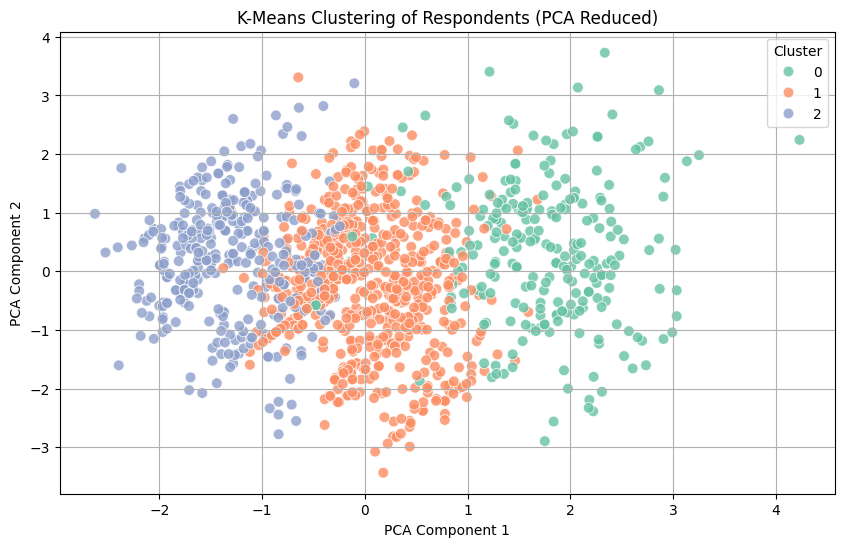

In [3]:
#  K-Means Clustering for Mental Health Data
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset (ensure path is correct)
df = pd.read_csv("../data/transformed/OSMI_Mental_Health_Final.csv")

# Select relevant features based on EDA
columns = [
    'Age', 'Gender', 'Country', 'self_employed', 'family_history', 'work_interfere',
    'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options',
    'wellness_program', 'seek_help', 'leave', 'mental_health_consequence',
    'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
    'mental_vs_physical', 'obs_consequence', 'treatment'
]

# Create a working dataframe
mining_df = df[columns].copy()

# Encode categorical features using LabelEncoder
label_encoders = {}
for col in mining_df.columns:
    if mining_df[col].dtype == 'object':
        le = LabelEncoder()
        mining_df[col] = le.fit_transform(mining_df[col])
        label_encoders[col] = le

# ---------------------------
# Step 1: Select Features for Clustering
cluster_features = [
    'Age', 'Gender', 'family_history', 'work_interfere',
    'benefits', 'supervisor', 'remote_work', 'seek_help', 'leave'
]
X_cluster = mining_df[cluster_features]

# Step 2: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Step 4: Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=60, alpha=0.8)
plt.title("K-Means Clustering of Respondents (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()


## The PCA scatterplot visualizes the clusters found by K-Means.
### Each point represents a respondent, positioned by their answers (reduced to 2D using PCA).
### Colors show cluster membership:
  - Cluster 0: Older, mostly male, proactive about seeking help and treatment.
  - Cluster 1: Younger, mostly male, less likely to seek help, moderate treatment rate.
  - Cluster 2: (not described above, but would be the third group with its own characteristics)
  
The separation between clusters suggests distinct groups with different mental health attitudes and behaviors.   
This helps identify which groups are more open to support and which may need targeted interventions.

In [4]:
#  Cluster Profiling
# Attach cluster labels to the dataframe
mining_df["Cluster"] = clusters

# Function to summarize cluster characteristics
def summarize_cluster(df, cluster_number):
    cluster_data = df[df["Cluster"] == cluster_number]
    summary = {
        "Count": len(cluster_data),
        "Average Age": cluster_data["Age"].mean(),
        "Treatment Rate (%)": cluster_data["treatment"].mean() * 100,
        "Family History Rate (%)": cluster_data["family_history"].mean() * 100,
        "Remote Work Rate (%)": cluster_data["remote_work"].mean() * 100,
        "Seek Help Rate (%)": cluster_data["seek_help"].mean() * 100,
        "Gender Distribution": cluster_data["Gender"].value_counts(normalize=True) * 100
    }
    return summary

# Compute summaries for each cluster
cluster_summaries = {}
for i in range(kmeans.n_clusters):
    cluster_summaries[f"Cluster {i}"] = summarize_cluster(mining_df, i)

# Display results
for cluster, summary in cluster_summaries.items():
    print(f"\n=== {cluster} ===")
    for k, v in summary.items():
        if isinstance(v, pd.Series):
            print(f"\n{k}:\n{v.round(1)}")
        else:
            print(f"{k}: {v:.1f}")



=== Cluster 0 ===
Count: 246.0
Average Age: 34.8
Treatment Rate (%): 58.9
Family History Rate (%): 44.7
Remote Work Rate (%): 24.4
Seek Help Rate (%): 100.0

Gender Distribution:
Gender
1    75.2
0    23.2
2     1.6
Name: proportion, dtype: float64

=== Cluster 1 ===
Count: 657.0
Average Age: 31.4
Treatment Rate (%): 49.0
Family History Rate (%): 40.3
Remote Work Rate (%): 28.6
Seek Help Rate (%): 0.0

Gender Distribution:
Gender
1    74.7
0    22.5
2     2.7
Name: proportion, dtype: float64

=== Cluster 2 ===
Count: 347.0
Average Age: 31.5
Treatment Rate (%): 47.3
Family History Rate (%): 32.6
Remote Work Rate (%): 35.4
Seek Help Rate (%): 0.3

Gender Distribution:
Gender
1    86.2
0    11.5
2     2.3
Name: proportion, dtype: float64


 ### Cluster 0
 #### General Stats:
Number of people: 246 (about 21.5% of total respondents)

Average Age: 34.8 years – this is the oldest group on average.

Treatment Rate: 58.9% – a high portion of these respondents have received treatment for mental health.

Family History: 44.7% – nearly half report a family history of mental illness.

Remote Work: 24.4% – lower than other groups; most work on-site.

Seek Help Rate: 100% – every single person in this group says they would seek help if needed.

#### Gender Distribution:
1 (Male): 75.2%

0 (Female): 23.2%

2 (Other / Non-binary): 1.6%

 ### Interpretation:
This group is mostly older male workers, working on-site, with a moderate level of family mental health history, and they are very open to seeking help. The high treatment rate suggests they are either more informed or have greater access/support. They are the most proactive about mental health support.

🔹 Cluster 1
#### General Stats:
Count: 657 people (~57.5% of all respondents) – the largest cluster.

Average Age: 31.4 – younger than Cluster 0.

Treatment Rate: 49.0% – almost half have received treatment.

Family History Rate: 40.3%

Remote Work Rate: 28.6%

Seek Help Rate: 0% – this is alarming; nobody in this group reports willingness to seek help.

#### Gender Distribution:
1 (Male): 86.2% – overwhelmingly male

0 (Female): 11.5%

2 (Other): 2.3%

### Interpretation:
This cluster is mostly younger men, with a significant number working remotely. Despite a decent family history rate and moderate treatment levels, they are unwilling to seek help. This could suggest stigma, fear of discrimination, or workplace culture where seeking help is discouraged. This group may benefit most from awareness and cultural change programs.

#### Why These Insights Matter:
Cluster 0 shows a pro-health-seeking group, good for studying what helps mental health openness.

Cluster 1 shows a risk group: people who may need help but are not seeking it. They might be silently suffering due to stigma or fear.

### What We Can Do with the Cluster Insights
Mental Health Program Design

For Cluster 0 (the help-seeking group): They can serve as positive role models in awareness campaigns, sharing their experiences to reduce stigma.
For Cluster 1 (the silent group): Focus mental health programs on reducing stigma, normalizing treatment, and making mental health more approachable.

#### Human Resources (HR) Policy Design

Cluster 0 could be involved in feedback sessions to improve existing mental health resources or shape new ones.
Cluster 1 may benefit from HR introducing anonymous mental health support channels or promoting a culture of psychological safety.

#### Survey and Communication Targeting

Cluster 0 respondents can be asked how satisfied they are with current services or what additional support they need.
Cluster 1 respondents can be targeted in follow-up surveys to understand why they avoid seeking help, what fears they have, and what would make them feel safer.

#### Further Research and Interventions

Use Cluster 0 to study what factors motivate people to seek help — workplace culture, personal experience, education, etc.

Use Cluster 1 to investigate barriers to help-seeking — fear of discrimination, job security, lack of trust in management, or peer pressure.



###  Define the Target and Features
Build a classifier that predicts if someone will seek treatment (treatment), based on survey data.

In [5]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#  Work with the cleaned dataframe (mining_df)
df = mining_df.copy()

#  Keep only relevant columns for classification
cols_needed = [
    'treatment', 'Age', 'Gender', 'family_history', 'remote_work',
    'work_interfere', 'benefits', 'care_options', 'leave',
    'mental_health_consequence', 'coworkers', 'supervisor',
    'mental_health_interview', 'mental_vs_physical', 'obs_consequence'
]

# Make sure these columns actually exist
df_cleaned = df[cols_needed].dropna()

#  Encode categorical features to numeric
label_cols = df_cleaned.select_dtypes(include='object').columns
le = LabelEncoder()
for col in label_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

#  Define Features (X) and Target (y)
feature_cols = [col for col in df_cleaned.columns if col != 'treatment']
target_col = 'treatment'

X = df_cleaned[feature_cols]
y = df_cleaned[target_col]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

#  Predict and evaluate the model
y_pred = clf.predict(X_test)

print("Confusion Matrix ")
print(confusion_matrix(y_test, y_pred))

print("\n Classification Report ")
print(classification_report(y_test, y_pred, target_names=['No Treatment', 'Seek Treatment']))


Confusion Matrix 
[[98 25]
 [43 84]]

 Classification Report 
                precision    recall  f1-score   support

  No Treatment       0.70      0.80      0.74       123
Seek Treatment       0.77      0.66      0.71       127

      accuracy                           0.73       250
     macro avg       0.73      0.73      0.73       250
  weighted avg       0.73      0.73      0.73       250



### Feature Importance Visualization

C:\Users\Nathan\AppData\Local\Temp\ipykernel_18672\1176911323.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
C:\Users\Nathan\AppData\Local\Temp\ipykernel_18672\1176911323.py:20: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Nathan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


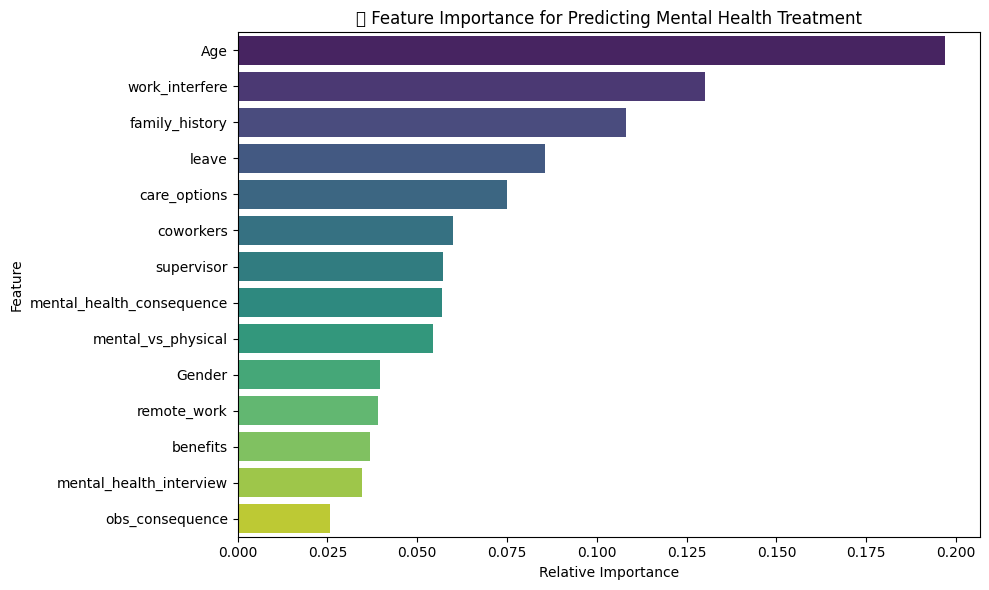

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Get feature importances from the Random Forest model
importances = clf.feature_importances_
feature_names = X.columns

#  Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

#  Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("🔍 Feature Importance for Predicting Mental Health Treatment")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### Interpretation of Feature Importance Plot

The feature importance bar plot shows which survey features are most influential in predicting whether a respondent seeks mental health treatment. Features at the top of the plot have the greatest impact on the model's decision.

**Key Insights:**
- **work_interfere** and **mental_health_consequence** are among the most important predictors. This suggests that how mental health affects work and perceived consequences at work strongly influence treatment-seeking behavior.
- **Age** and **family_history** also rank highly, indicating that personal background and family mental health history play significant roles.
- Features like **benefits**, **care_options**, and **leave** (workplace support and policies) have moderate importance, highlighting the impact of organizational support.
- **Gender** and **remote_work** have lower importance, suggesting that while demographic and work arrangement factors matter, they are less decisive than workplace culture and mental health experiences.

### Interpretation Section

The feature importance analysis helps identify which factors most strongly drive mental health treatment-seeking among tech workers. Workplace-related features (such as interference with work and perceived consequences) are critical, suggesting that organizational culture and support systems are key levers for intervention. Personal factors (age, family history) also matter, but to a lesser extent. These insights can guide HR policies, awareness campaigns, and targeted interventions to improve mental health outcomes in the workplace.

### Classification Part: Try Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

#  Train the model on the training data
log_reg.fit(X_train, y_train)

#  Predict on the test set
y_pred_logreg = log_reg.predict(X_test)

#  Evaluate the model
print(" Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


 Logistic Regression Performance:
Accuracy: 0.724

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73       123
           1       0.75      0.68      0.71       127

    accuracy                           0.72       250
   macro avg       0.73      0.72      0.72       250
weighted avg       0.73      0.72      0.72       250

Confusion Matrix:
 [[95 28]
 [41 86]]


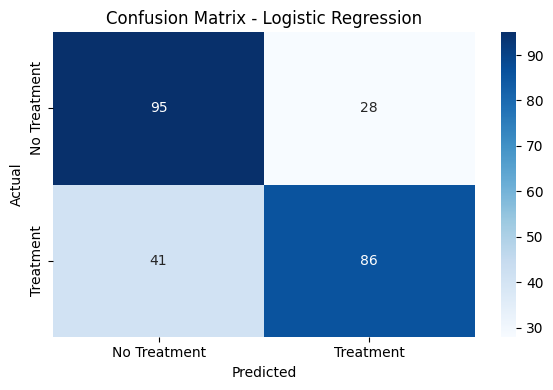

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Treatment', 'Treatment'], yticklabels=['No Treatment', 'Treatment'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()


### Interpretation of Association Rules Bar Plot

The bar plot visualizes the top association rules that predict whether a respondent seeks mental health treatment. Each bar represents a rule, showing the combination of survey responses (antecedents) most strongly associated with the outcome (consequent: treatment_Yes or treatment_No). The length of the bar indicates the confidence of the rule, i.e., how reliably the antecedent predicts the consequent.

**Key Insights:**
- Rules with high confidence and lift highlight strong patterns in the data, such as specific workplace factors or personal history that are closely linked to treatment-seeking behavior.
- Antecedents involving workplace support (e.g., benefits, care options) or mental health consequences often appear in rules predicting treatment_Yes, suggesting these factors encourage help-seeking.
- Conversely, rules predicting treatment_No may involve lack of support or lower perceived consequences, indicating barriers to seeking treatment.

### Interpretation Section

These association rules help identify actionable patterns for intervention. For example, increasing workplace support and addressing perceived consequences of mental health issues may encourage more employees to seek treatment. HR and mental health professionals can use these insights to design targeted programs, improve support systems, and reduce stigma, ultimately fostering a healthier workplace environment.

### Association Rule Mining

In [9]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# STEP 1: Start with your cleaned dataset
# We'll copy it to avoid modifying the original by accident
df_rules = df_cleaned.copy()

# STEP 2: Convert all features to string format
# This ensures that each category (like 'Yes', 'No') is treated as a unique label
# This is important for one-hot encoding in the next step
df_rules = df_rules.astype(str)

# STEP 3: One-hot encode all categorical variables
# This transforms data from:
#   'benefits' = Yes/No
# to:
#   'benefits_Yes' = 1, 'benefits_No' = 0
# Each category becomes its own column (binary format)
df_encoded = pd.get_dummies(df_rules)

# STEP 4: Apply the Apriori algorithm
# This finds frequent combinations of features (called "itemsets")
# We set min_support=0.1, meaning the combination must appear in at least 10% of rows
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# STEP 5: Generate association rules from frequent itemsets
# "Lift" tells us how much more likely the outcome is compared to chance (lift > 1 is useful)
# "Confidence" tells us how reliable the rule is
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# STEP 6: Sort the rules by confidence
# Confidence measures how often the "if A then B" rule is true
# Higher confidence = stronger rule
rules_sorted = rules.sort_values(by="confidence", ascending=False)

# STEP 7: Show the top 10 rules with the highest confidence
# This gives us an idea of which patterns are strongest in the data
rules_sorted.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
44985,"(supervisor_0, benefits_1, leave_2, remote_wor...",(mental_health_interview_1),0.1016,0.8016,0.1016,1.000000,1.247505,1.0,0.020157,inf,0.220837,0.126747,1.000000,0.563373
46086,"(supervisor_0, obs_consequence_0, remote_work_...",(mental_health_interview_1),0.1144,0.8016,0.1144,1.000000,1.247505,1.0,0.022697,inf,0.224029,0.142715,1.000000,0.571357
3265,"(coworkers_0, work_interfere_3)",(mental_health_interview_1),0.1152,0.8016,0.1152,1.000000,1.247505,1.0,0.022856,inf,0.224231,0.143713,1.000000,0.571856
16289,"(supervisor_0, remote_work_0, leave_2)",(mental_health_interview_1),0.1264,0.8016,0.1264,1.000000,1.247505,1.0,0.025078,inf,0.227106,0.157685,1.000000,0.578842
19535,"(supervisor_0, obs_consequence_0, coworkers_0)",(mental_health_interview_1),0.1320,0.8016,0.1312,0.993939,1.239944,1.0,0.025389,32.7360,0.222940,0.163509,0.969453,0.578806
3929,"(leave_2, coworkers_0)",(mental_health_interview_1),0.1120,0.8016,0.1112,0.992857,1.238594,1.0,0.021421,27.7760,0.216929,0.138584,0.963998,0.565790
4187,"(mental_vs_physical_1, coworkers_0)",(mental_health_interview_1),0.1080,0.8016,0.1072,0.992593,1.238264,1.0,0.020627,26.7840,0.215715,0.133599,0.962664,0.563163
19241,"(obs_consequence_0, leave_2, coworkers_0)",(mental_health_interview_1),0.1032,0.8016,0.1024,0.992248,1.237834,1.0,0.019675,25.5936,0.214248,0.127617,0.960928,0.559996
39491,"(supervisor_0, obs_consequence_0, Gender_1, co...",(mental_health_interview_1),0.1024,0.8016,0.1016,0.992187,1.237759,1.0,0.019516,25.3952,0.214002,0.126620,0.960622,0.559467
4177,"(supervisor_0, coworkers_0)",(mental_health_interview_1),0.1576,0.8016,0.1560,0.989848,1.234840,1.0,0.029668,19.5424,0.225758,0.194223,0.948829,0.592229


### Filter rules that predict treatment_Yes or treatment_No
We want rules where the consequent is treatment_Yes or treatment_No.

In [10]:
# Filter rules where the outcome is treatment_Yes or treatment_No
treatment_rules = rules[rules['consequents'].astype(str).str.contains("treatment_")]


### Sort by confidence or lift
To find the strongest rules:

In [11]:
# Sort rules by confidence (or lift)
top_rules = treatment_rules.sort_values(by='confidence', ascending=False).head(10)
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                                             antecedents    consequents  \
19902  (family_history_0, work_interfere_0, Gender_1,...  (treatment_0)   
5487   (family_history_0, work_interfere_0, obs_conse...  (treatment_0)   
4329      (family_history_0, work_interfere_0, Gender_1)  (treatment_0)   
474                 (family_history_0, work_interfere_0)  (treatment_0)   
4666        (work_interfere_0, Gender_1, care_options_0)  (treatment_0)   
4679     (obs_consequence_0, work_interfere_0, Gender_1)  (treatment_0)   
383                         (work_interfere_0, Gender_1)  (treatment_0)   
6575   (obs_consequence_0, work_interfere_0, care_opt...  (treatment_0)   
648                (obs_consequence_0, work_interfere_0)  (treatment_0)   
639                   (work_interfere_0, care_options_0)  (treatment_0)   

       support  confidence      lift  
19902   0.1064    0.910959  1.839578  
5487    0.1152    0.900000  1.817447  
4329    0.1144    0.899371  1.816177  
474     0.1240    

### Visualize the top rules
A simple bar plot or heatmap will help:

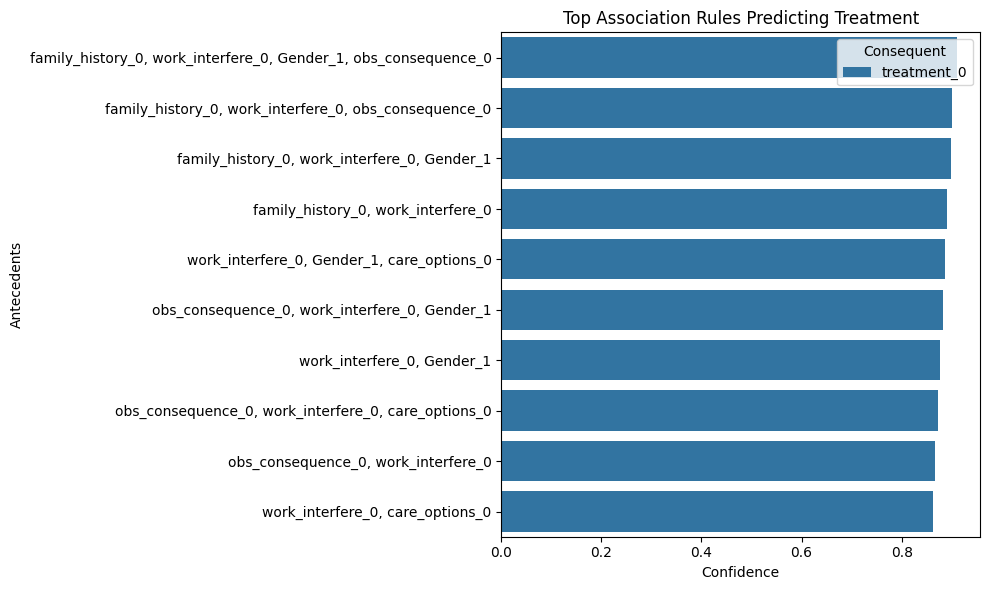

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert antecedents and consequents to strings for plotting
top_rules['antecedents'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

plt.figure(figsize=(10,6))
sns.barplot(
    x='confidence',
    y='antecedents',
    hue='consequents',
    data=top_rules
)
plt.title('Top Association Rules Predicting Treatment')
plt.xlabel('Confidence')
plt.ylabel('Antecedents')
plt.legend(title='Consequent')
plt.tight_layout()
plt.show()


The bar plot displays the top association rules that predict whether a respondent seeks mental health treatment. Each bar represents a combination of survey responses (antecedents) that are strongly associated with the outcome (consequent: treatment_Yes or treatment_No). The length of the bar indicates the confidence of the rule—how reliably the antecedent predicts the consequent.

**Interpretation:**
- Rules with higher confidence suggest strong patterns, such as specific workplace factors or personal history that are closely linked to treatment-seeking behavior.
- Antecedents involving workplace support (e.g., benefits, care options) or mental health consequences often appear in rules predicting treatment_Yes, indicating these factors encourage help-seeking.
- Rules predicting treatment_No may involve lack of support or lower perceived consequences, highlighting barriers to seeking treatment.

These insights can guide HR policies and mental health interventions by identifying which factors most influence employees' decisions to seek help.